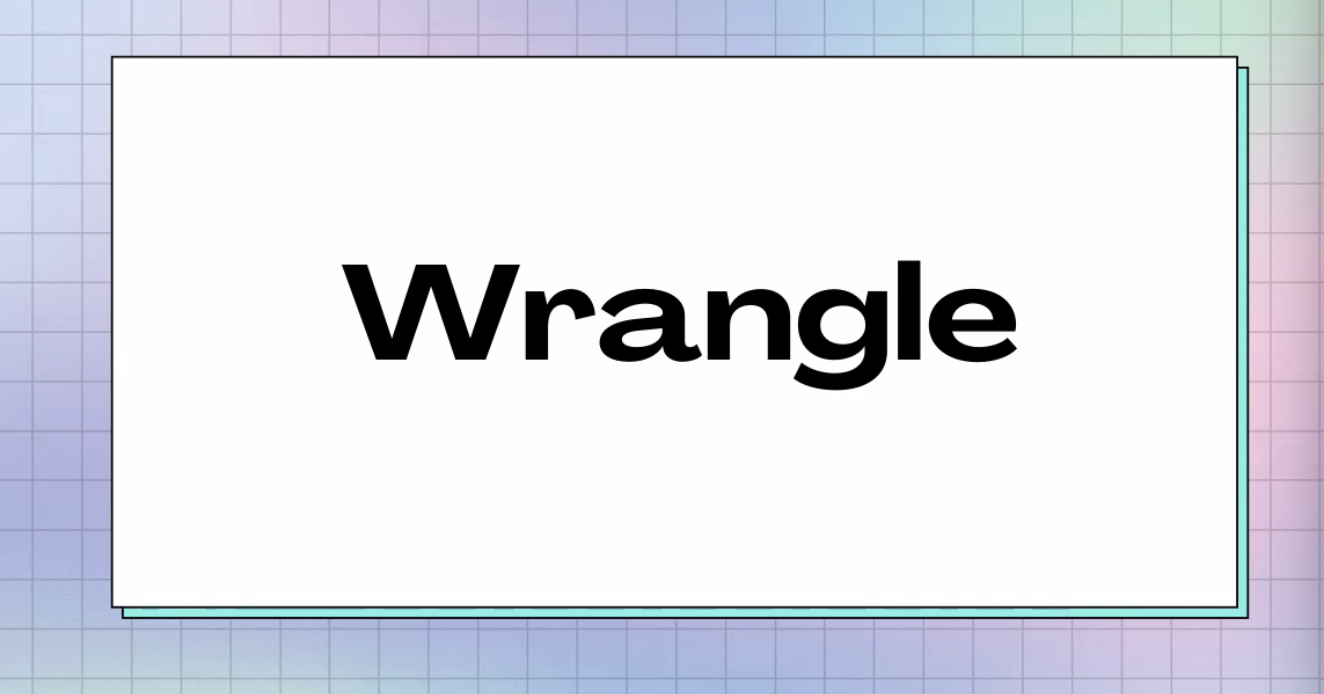

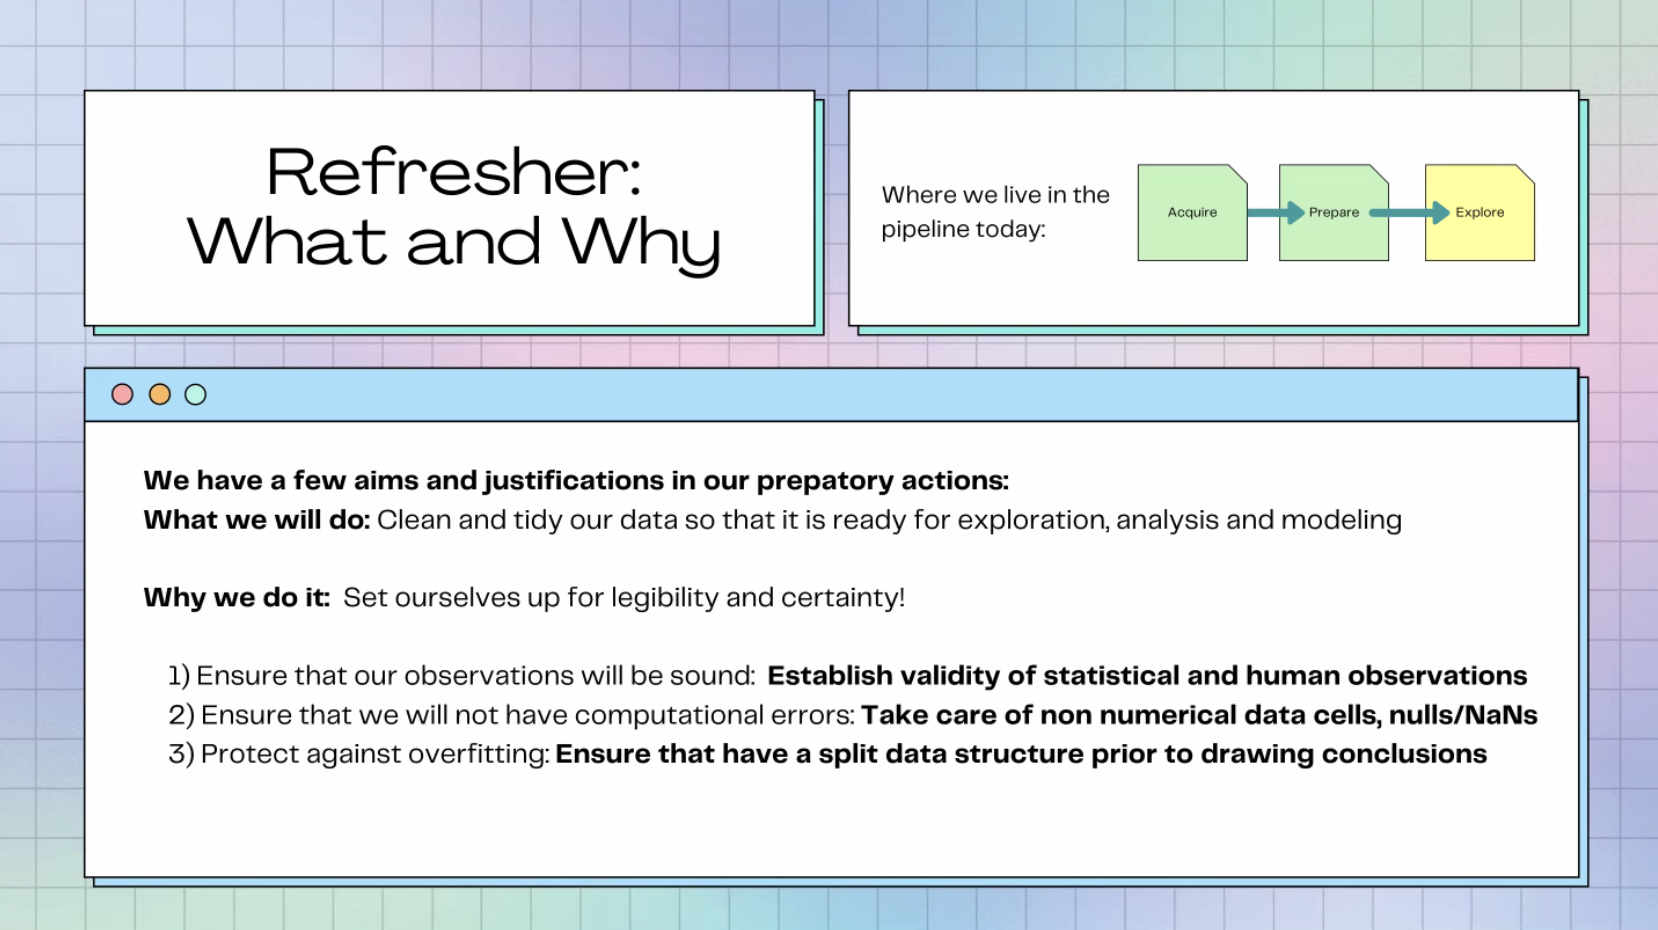

- Looking at both acquire and prepre and bundling them together
- we will be getting our data and preparing tin to show validity, remove non numeric cells, change form non numeric to numeric, and split the data.
    - here we will be doing it from a diffeent lens/aim versus how we did in classification
        - the approach is differnt
            - this is why the planning phase is so important.


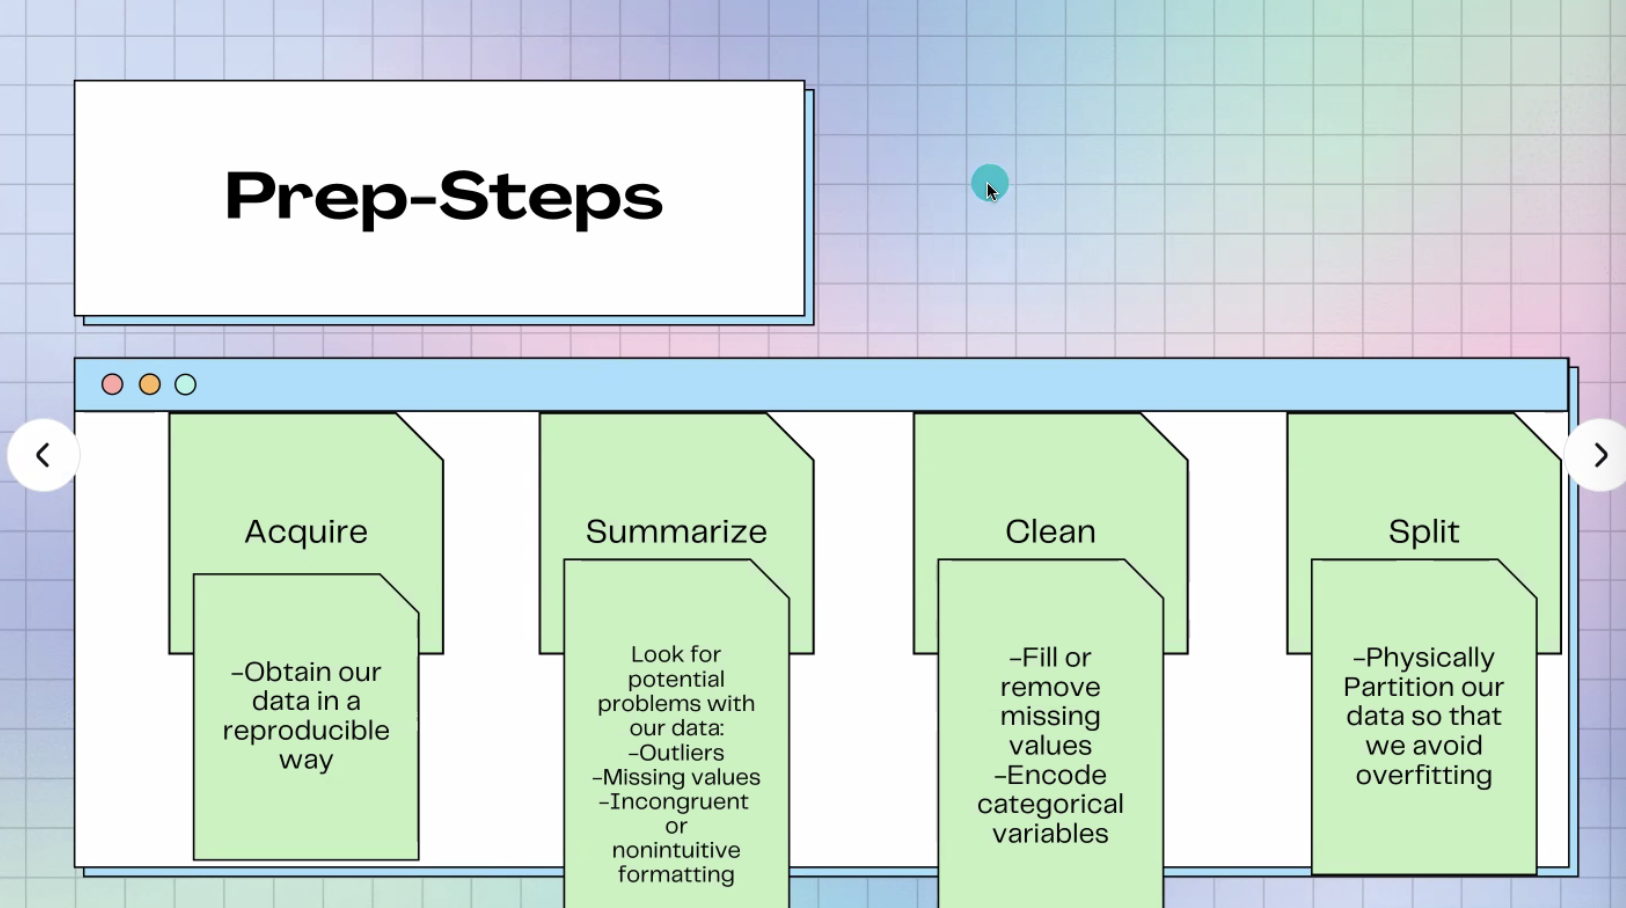


**When we say "wrangle" we are referring to a combination of 2 steps pf the pipeline that we are now familarized with Acquision and Prep. Wrangling is the act of obtaining our data and ensuring that it is ready for analysis and modeling**

# Acquire and Prep

In the following lessons, we will walk through the data science pipeline using the following example:

I am a university teacher, and I want to know when to worry about a student's progress. I want to be able to work with any students who are a high risk of failing the class, so that I can try to prevent that from happening. I have the grades of the three exams and the final grade from last semester's class. I am hoping I can build a prediction model that would be able to use those exams to predict the final grade +/- 5 points per student.

### Acquire the Data

In [24]:
# get our imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env

In [25]:
# we want to grab our dataframe
df = pd.read_csv("student_grades.csv")

# you can also read it in if it is in a different folder which is helpful
    # pd.read_csv("(the_full_path)/student_grades.csv")

## Sample and summarize

In [26]:
df.head(10)
# we can already see a NAN on row 9

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97
5,6,79.0,70,85,81
6,7,92.0,89,94,93
7,8,73.0,70,75,76
8,9,70.0,65,78,77
9,10,NaN,70,79,70


In [27]:
df.shape
# 104 rows and 5 columns

(104, 5)

In [28]:
df.describe()
# min grades are pretty good
# but we are trying to imporve success


,student_id,exam1,exam2,final_grade
count,104.000000,103.000000,104.000000,104.000000
mean,52.500000,78.621359,77.307692,81.692308
std,30.166206,14.260955,10.295703,10.918122
min,1.000000,57.000000,65.000000,65.000000
25%,26.750000,70.000000,70.000000,72.000000
50%,52.500000,79.000000,75.000000,81.000000
75%,78.250000,92.000000,89.000000,93.000000
max,104.000000,100.000000,93.000000,97.000000


In [29]:
df.info()
# we can see that on exam 1 we have 103 non null values instead of 104 so we know 100% this is something that needs to be fixed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        104 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


Takeaways:

1. We know that we have one null value in exam1, that we have already located
    - exam1 has 1 null value (RangeIndex-exam1)
    - exam1 should likely be of type int64 once the null value is addressed
2.  exam 3 is an object and we will want to convert that to a numerical data type
    - there is likely an odd value in exam3, as it should be of type int64 but was read in as an object. We need to find that value.
- given that there are limited attributes and limited observations with missing values, dropping the observations with missing values is probably a good way to go here.

Other ways to find null values, when you are dealing with a larger dataframe, especially one with more attributes and more missing values:

In [30]:
print(df.isnull().sum())

student_id     0
exam1          1
exam2          0
exam3          0
final_grade    0
dtype: int64


In [31]:
print(df.columns[df.isnull().any()])

Index(['exam1'], dtype='object')


Find the odd value in exam3:

In [32]:
df.exam3.isnull().sum()

0

In [33]:
# problems i exam 3
df.exam3.value_counts()
# the very last one there is a value that appears to be empty
    # this didnt show when we run df.exam3.isnull().sum()

# df.exam3.value_counts(sort=True, ascending=True)
    # this will do the same thing but put it in reverse order

78    16
96    16
75    15
87     8
95     8
86     8
79     8
70     8
85     8
94     8
       1
Name: exam3, dtype: int64

In [34]:
# df['mock_exam1'] = (df.final_grade * 3) - (df.exam3 + df.exam2)

In [35]:
# convert the white space in exam3 into a null value
df['exam3'] = df['exam3'].replace(r'^\s*$', np.nan, regex = True)

In [36]:
# could also do df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
    # this will just do it for the whole df not just the one column

In [37]:
df.exam3.isnull().sum()
# and now we have 1 null value in the exam3 column

1

In [38]:
# Because we have evidence that these are missing grades in the df, we will not impute the values and deip the two rows that involve missing grades
df = df.dropna()

In [39]:
df.exam3.value_counts()
# we can see everything that is left is numerical

78    16
96    16
75    15
87     8
95     8
86     8
70     8
85     8
94     8
79     7
Name: exam3, dtype: int64

Verify that our empty string has been replaced by a null

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   102 non-null    int64  
 1   exam1        102 non-null    float64
 2   exam2        102 non-null    int64  
 3   exam3        102 non-null    object 
 4   final_grade  102 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.8+ KB


- drop all observations with missing values
- update the data types to int

In [41]:
df = df.dropna().astype('int')

You may want to fill your missing values with a value instead of dropping the rows. One way to do that is to apply the method fillna() to your dataframe. `df.fillna()`

When running `describe()`, we should now see exam3 listed since we have converted it to a numeric type.

In [42]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,53.313725,78.833333,77.500000,84.294118,81.970588
std,29.886909,14.167375,10.297313,8.736617,10.833991
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,28.250000,70.000000,70.000000,78.000000,72.000000
50%,53.500000,79.000000,75.000000,85.000000,81.000000
75%,78.750000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


In [43]:
# lets drop student_id because it does not help in this case
    # if you wanted to do this you would use
df = df.drop(columns = 'student_id')

# I dont want studnet_id because the value of the student id will throw off the math of the final grade. 
    # If jessica has studnet id of 20 it will end up lowering her final grade significalntly

In [44]:
df.head()
# We can add the student_id's beck on later

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


# Visualize Distribution
Plot histograms &/or boxplots to see the distribution, skewness, outliers, and unit scales.

### matplotlib.pyplot

Here we'll loop through each of the numeric columns of interest, and show the distribution of each on a separate subplot.

In [45]:
# Madelines plot

for i, val in enumerate(list(df.columns)):
    print(i)
    print(val)
    # remember order is important



0
exam1
1
exam2
2
exam3
3
final_grade


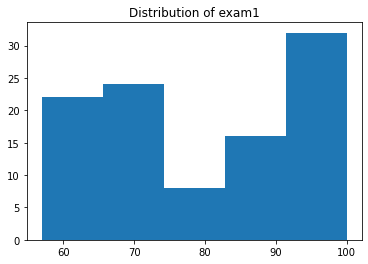

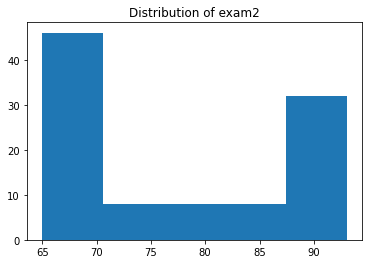

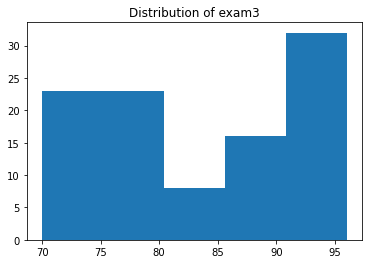

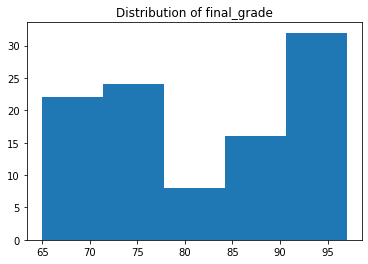

In [62]:
# Madelines plot

for i, val in enumerate(list(df.columns)):
    plotnum = i + 1
#     plt.subplot(4,1,plotnum)
    plt.title(f'Distribution of {val}')
    plt.hist(df[val], bins=5)
    plt.show()

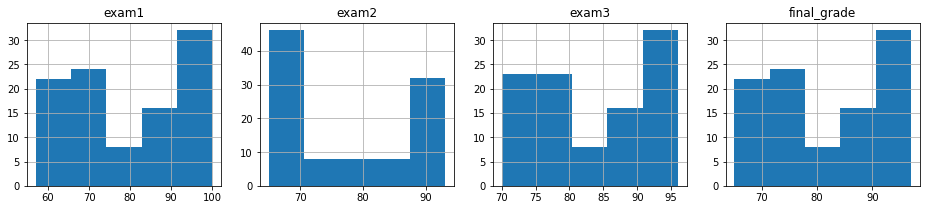

In [47]:
# Codeup's plot
plt.figure(figsize=(16, 3))

for i, col in enumerate(['exam1', 'exam2', 'exam3', 'final_grade']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist(bins=5)
    
# dont look normally distributed
    # exam 2 looks like an inverse bell
        # there are a few things we may want to take care of

### seaborn.boxplot

seaborn.boxplot will default to plotting all the numeric variables if we don't specify specific x and y values.

<AxesSubplot:>

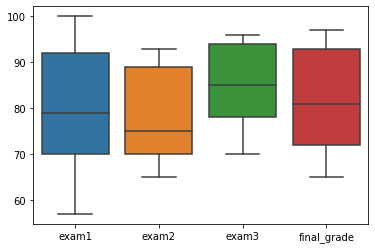

In [48]:
# Madeline's

sns.boxplot(data=df)

<AxesSubplot:>

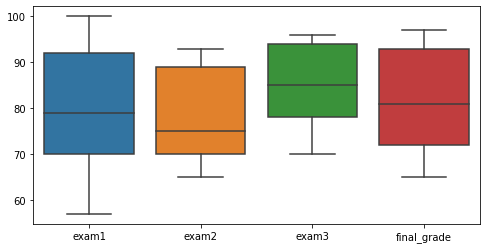

In [49]:
# Codeup's

# we don't want to plot the `student_id` column.
plt.figure(figsize=(8,4))
sns.boxplot(data=df)
# sns.boxplot(data=df.drop(columns=['student_id']))
    # if you didnt drop the student id column earlier

## Now we split it

In [50]:
from sklearn.model_selection import train_test_split
train_val, test = train_test_split(df, train_size=0.8, random_state=1234)

In [51]:
train, validate = train_test_split(train_val, train_size=0.7, random_state=1234)

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 95 to 62
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   exam1        56 non-null     int64
 1   exam2        56 non-null     int64
 2   exam3        56 non-null     int64
 3   final_grade  56 non-null     int64
dtypes: int64(4)
memory usage: 2.2 KB


In [53]:
def acquire_grades():
    '''
    Grab our data from a path and rea in from csv.
    '''
    df = pd.read_csv("student_grades.csv")
    return df

In [54]:
def clean_grades(df):
    '''
    Takes in df of students grades and cleans the data by
    droping null values
    replacing whitespace
    converting data to numerical data types
    dropping 'student_id' column
    
    returns a clean df as a pandas df
    '''
    # convert the white space in exam3 into a null value
    df['exam3'] = df['exam3'].replace(r'^\s*$', np.nan, regex = True)
    # Because we have evidence that these are missing grades in the df, we will not impute the values and deip the two rows that involve missing grades
    df = df.dropna()
    # switch it all to integer
    df = df.dropna().astype('int')
    # dropping student_id
    df = df.drop(columns = 'student_id')
    return df

In [58]:
def split_data(df):
    '''
    split our data
    takes in a pandas dataframe
    returns 3 panda dataframs:
        train
        test
        validate
    '''
    train_val, test = train_test_split(df, train_size=0.8, random_state=1234)
    train, validate = train_test_split(train_val, train_size=0.7, random_state=1234)
    return train, validate, test

### Pipeline Function

We finalize these steps (acquire & prep) by writing a function that will reproduce the dataframe with the necessary changes.

In [59]:
def wrangle_grades():
    '''
    rangle_grades will read in our student grades as a pandas dataframe
    clean the date
    split the date
    return train, validate, test sets of pandas dataframe from students grades
    stratified on final_grade
    '''
    df = clean_grades(acquire_grades())
    return split_data(df)

In [60]:
train1, val1, test1 = wrangle_grades()